In [779]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')

In [692]:
#import sys
#!{sys.executable} -m pip install pandasql

In [693]:
from pandasql import sqldf

In [694]:
# Data Pre-processing

# Importing dataset
df = pd.read_csv("Rozas_Boadilla_Torrelodones_dataset_20210204.csv", encoding='latin-1')

In [695]:
df.head(1)

,title,price_ineuro,page_url,number_ofpictures,broker_phone,size_insqm,bedrooms,floor,property_type,area,municipality,country,source,scraping_time
0,Casa o chalet independiente en Urb. este - Mon...,1195000,https://www.idealista.com/inmueble/91850590/,36.0,913 570 990,600.0,6,NaN,Chalet independiente,Urb. este - Montepríncipe,Boadilla del Monte,Spain,idealista.com,03/02/2021 23:57


In [696]:
df.columns

Index(['title', 'price_ineuro', 'page_url', 'number_ofpictures',
       'broker_phone', 'size_insqm', 'bedrooms', 'floor', 'property_type',
       'area', 'municipality', 'country', 'source', 'scraping_time'],
      dtype='object')

In [697]:
# change the column names
df.rename(index=str, columns={'price_ineuro': 'price'}, inplace=True)

In [698]:
df.describe()

,price,number_ofpictures,size_insqm,bedrooms
count,1.498000e+03,1488.000000,1495.000000,1498.000000
mean,6.671071e+05,31.314516,320.808027,4.321762
std,5.739846e+05,16.847526,300.119133,3.355462
min,5.800000e+04,1.000000,4.000000,1.000000
25%,3.850000e+05,20.000000,127.000000,3.000000
50%,5.370000e+05,29.000000,250.000000,4.000000
75%,7.850000e+05,40.000000,420.500000,5.000000
max,1.100000e+07,185.000000,4555.000000,90.000000


In [699]:
df.dtypes

title                 object
price                  int64
page_url              object
number_ofpictures    float64
broker_phone          object
size_insqm           float64
bedrooms               int64
floor                 object
property_type         object
area                  object
municipality          object
country               object
source                object
scraping_time         object
dtype: object

In [700]:
df.apply(lambda x: sum(x.isnull()),axis=0)

title                   0
price                   0
page_url                0
number_ofpictures      10
broker_phone           38
size_insqm              3
bedrooms                0
floor                1027
property_type           0
area                    0
municipality            0
country                 0
source                  0
scraping_time           0
dtype: int64

In [701]:
df.groupby('municipality')['title'].count()

municipality
Boadilla del Monte     457
Las Rozas de Madrid    798
Torrelodones           243
Name: title, dtype: int64

In [702]:
sqldf("select count(title),broker_phone from dataset group by broker_phone order by 1 desc limit 15")

,count(title),broker_phone
0,56,914 892 842
1,54,910 751 798
2,38,None
3,38,916 361 563
4,30,916 360 000
5,28,916 350 429
6,22,916 331 873
7,22,918 001 673
8,20,912 660 953
9,18,918 008 367


In [703]:
df.drop(["title","source","scraping_time","page_url","country","area"], axis=1, inplace=True)

In [704]:
df.columns

Index(['price', 'number_ofpictures', 'broker_phone', 'size_insqm', 'bedrooms',
       'floor', 'property_type', 'municipality'],
      dtype='object')

Median of Price = 537000.0


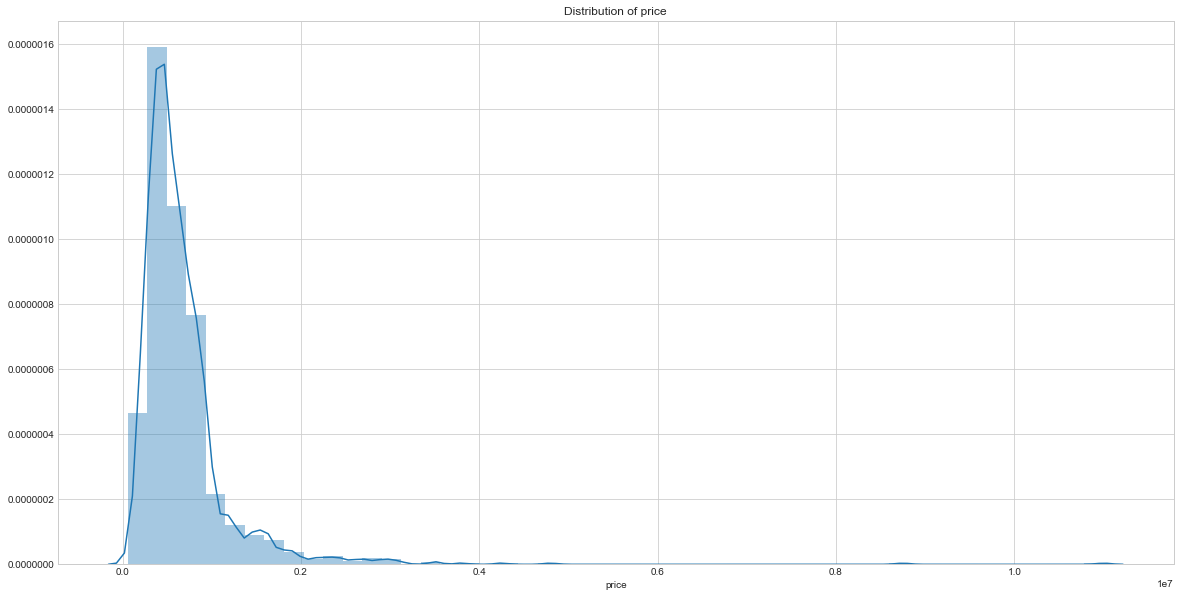

In [705]:
print("Median of Price =",dataset.price.median())
sns.distplot(dataset.price)
plt.title("Distribution of price")
plt.show()

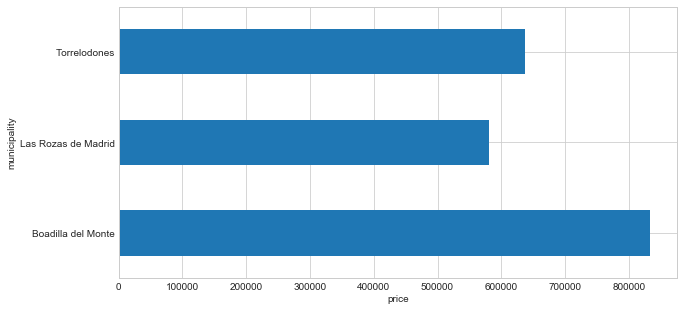

In [706]:
groups = dataset.groupby(['municipality'])['price'].mean()
plt.figure(figsize=(10, 5))
plt.xlabel('price')
groups.plot.barh()

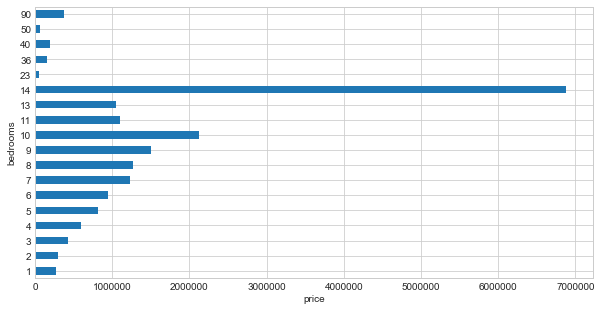

In [707]:
groups = dataset.groupby(['bedrooms'])['price'].mean()
plt.figure(figsize=(10, 5))
plt.xlabel('price')
groups.plot.barh()

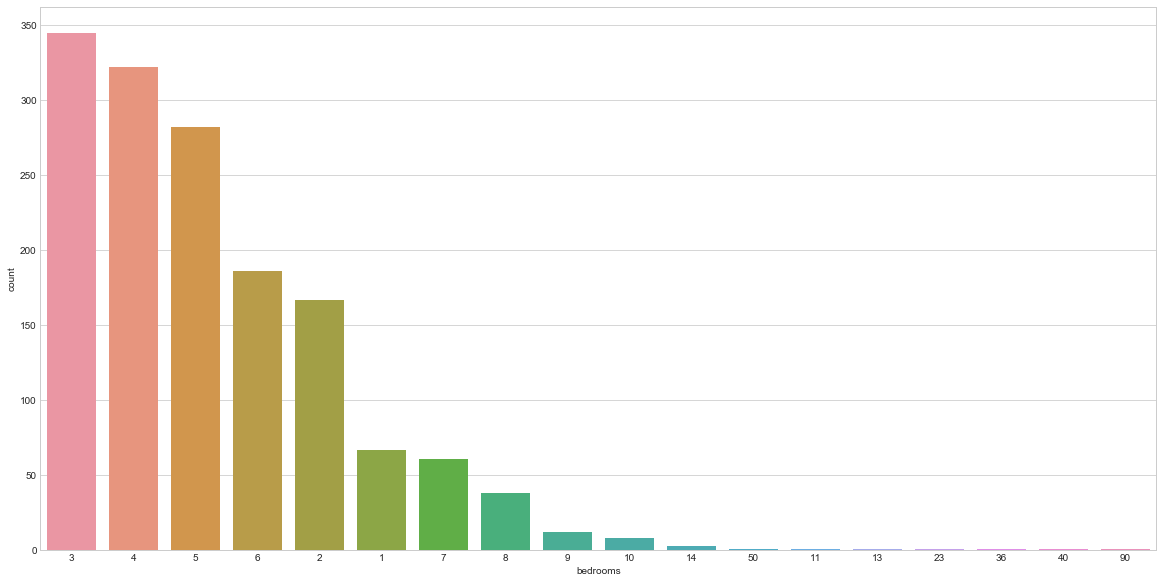

In [708]:
sns.countplot(dataset.bedrooms, order = dataset['bedrooms'].value_counts().index)

In [709]:
sqldf("select count(*),bedrooms,round(avg(price)) from dataset where bedrooms >= 10 group by bedrooms ")

,count(*),bedrooms,round(avg(price))
0,8,10,2118750.0
1,1,11,1105000.0
2,1,13,1050000.0
3,3,14,6883333.0
4,1,23,58000.0
5,1,36,150000.0
6,1,40,197000.0
7,1,50,59000.0
8,1,90,375000.0


In [710]:
df.drop(df[df['bedrooms']>10].index, inplace = True) 

In [711]:
df.apply(lambda x: sum(x.isnull()),axis=0)

price                   0
number_ofpictures      10
broker_phone           38
size_insqm              0
bedrooms                0
floor                1017
property_type           0
municipality            0
dtype: int64

In [712]:
df.floor.unique()

array([nan, '3ª planta exterior con ascensor',
       'Bajo exterior con ascensor', '1ª planta exterior con ascensor',
       '2ª planta exterior sin ascensor',
       '3ª planta exterior sin ascensor',
       '2ª planta exterior con ascensor', '2ª planta  con ascensor',
       '3ª planta  sin ascensor', '1ª planta exterior sin ascensor',
       'exterior con ascensor', '1ª planta  con ascensor',
       '2ª planta  sin ascensor', '4ª planta exterior con ascensor',
       'Bajo exterior sin ascensor', '1ª planta interior con ascensor',
       'Entreplanta exterior con ascensor', 'Bajo interior con ascensor',
       'Entreplanta exterior sin ascensor', 'con ascensor',
       '4ª planta exterior sin ascensor', '3ª planta  con ascensor',
       '2ª planta exterior', '2ª planta interior con ascensor',
       '4ª planta  con ascensor', 'sin ascensor', 'exterior',
       '2ª planta interior sin ascensor'], dtype=object)

In [713]:
df['floor'].fillna('ground floor',inplace = True)
df.isna().sum()

price                 0
number_ofpictures    10
broker_phone         38
size_insqm            0
bedrooms              0
floor                 0
property_type         0
municipality          0
dtype: int64

In [714]:
sqldf("select count(1),floor from df group by floor")

,count(1),floor
0,1,1ª planta con ascensor
1,120,1ª planta exterior con ascensor
2,27,1ª planta exterior sin ascensor
3,6,1ª planta interior con ascensor
4,3,2ª planta con ascensor
5,2,2ª planta sin ascensor
6,1,2ª planta exterior
7,91,2ª planta exterior con ascensor
8,21,2ª planta exterior sin ascensor
9,1,2ª planta interior con ascensor


3ª planta exterior con ascenso-3rd floor exterior with elevator
Bajo exterior con ascensor-Low exterior with elevator
1ª planta exterior con ascensor-1st floor exterior with elevator
2ª planta exterior sin ascensor-2nd floor without elevator
3ª planta exterior sin ascensor-3rd floor exterior without elevator
2ª planta exterior con ascensor-2nd floor exterior with elevator
2ª planta  con ascensor-2nd floor with elevator
3ª planta  sin ascensor-3rd floor without elevator
1ª planta exterior sin ascensor-1st floor exterior without elevator






In [715]:
df.head()

,price,number_ofpictures,broker_phone,size_insqm,bedrooms,floor,property_type,municipality
0,1195000,36.0,913 570 990,600.0,6,ground floor,Chalet independiente,Boadilla del Monte
1,750000,35.0,916 350 429,386.0,3,ground floor,Chalet independiente,Boadilla del Monte
2,485000,35.0,916 350 429,135.0,3,ground floor,Ático,Boadilla del Monte
3,450000,32.0,916 350 429,139.0,3,ground floor,Piso,Boadilla del Monte
4,595000,35.0,916 350 429,283.0,3,ground floor,Chalet adosado,Boadilla del Monte


In [716]:
df.drop(["broker_phone"], axis=1, inplace=True)

### Floor

In [717]:
df=sqldf("select *,case when floor like '3ª%' then '3ª' when floor like '2ª%' then '2ª' when floor like '1ª%' then '1ª'  when floor like '4ª%' then '4ª' when floor like 'ground floor' then 'planta baja' end as 'floor_levels' from df")

In [781]:
#df.floor_levels.unique()

In [783]:
#df['floor_levels'].value_counts().sort_index().plot.bar(color="green")

In [720]:
df['floor_levels'].value_counts()

planta baja    1017
1ª              154
2ª              120
3ª               87
4ª                9
Name: floor_levels, dtype: int64

### Elevator

In [721]:
df=sqldf("select *,case when floor like '%con ascensor' then 1 when floor like '%sin ascensor' then 0 end as 'IsElevator' from df")

In [722]:
df.head(1)

,price,number_ofpictures,size_insqm,bedrooms,floor,property_type,municipality,floor_levels,IsElevator
0,1195000,36.0,600.0,6,ground floor,Chalet independiente,Boadilla del Monte,planta baja,NaN


In [723]:
df.apply(lambda x: sum(x.isnull()),axis=0)

price                   0
number_ofpictures      10
size_insqm              0
bedrooms                0
floor                   0
property_type           0
municipality            0
floor_levels          101
IsElevator           1019
dtype: int64

In [724]:
df.shape

(1488, 9)

In [725]:
sqldf("select distinct floor,property_type,municipality,floor_levels,IsElevator from df where floor_levels is null ")

,floor,property_type,municipality,floor_levels,IsElevator
0,Bajo exterior con ascensor,Piso,Las Rozas de Madrid,None,1.0
1,exterior con ascensor,Piso,Las Rozas de Madrid,None,1.0
2,Bajo exterior con ascensor,Dúplex,Las Rozas de Madrid,None,1.0
3,Bajo exterior sin ascensor,Piso,Las Rozas de Madrid,None,0.0
4,Entreplanta exterior con ascensor,Piso,Las Rozas de Madrid,None,1.0
5,Bajo interior con ascensor,Piso,Las Rozas de Madrid,None,1.0
6,Entreplanta exterior sin ascensor,Piso,Las Rozas de Madrid,None,0.0
7,con ascensor,Piso,Las Rozas de Madrid,None,1.0
8,sin ascensor,Piso,Las Rozas de Madrid,None,0.0
9,exterior,Piso,Las Rozas de Madrid,None,NaN


In [726]:
sqldf("select distinct property_type,municipality,IsElevator from df where floor_levels='planta baja' ")

,property_type,municipality,IsElevator
0,Chalet independiente,Boadilla del Monte,None
1,Ático,Boadilla del Monte,None
2,Piso,Boadilla del Monte,None
3,Chalet adosado,Boadilla del Monte,None
4,Chalet pareado,Boadilla del Monte,None
5,Dúplex,Boadilla del Monte,None
6,Chalet independiente,Las Rozas de Madrid,None
7,Chalet adosado,Las Rozas de Madrid,None
8,Chalet pareado,Las Rozas de Madrid,None
9,Chalet independiente,Torrelodones,None


In [727]:
sqldf("select distinct property_type,municipality,IsElevator from df where IsElevator=1 ")

,property_type,municipality,IsElevator
0,Ático,Las Rozas de Madrid,1.0
1,Piso,Las Rozas de Madrid,1.0
2,Dúplex,Las Rozas de Madrid,1.0
3,Piso,Torrelodones,1.0
4,Dúplex,Torrelodones,1.0


### Setting elevator=0 for ground floor

In [728]:
df['IsElevator'] = np.where(df['floor_levels']=='planta baja', 0, df['IsElevator'])

In [729]:
df.apply(lambda x: sum(x.isnull()),axis=0)

price                  0
number_ofpictures     10
size_insqm             0
bedrooms               0
floor                  0
property_type          0
municipality           0
floor_levels         101
IsElevator             2
dtype: int64

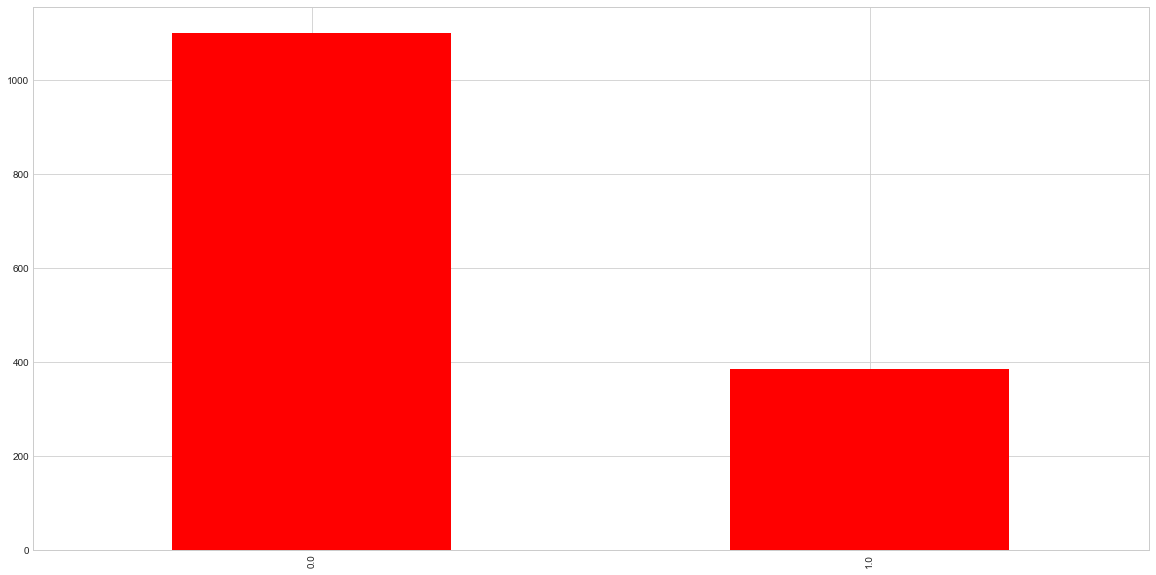

In [730]:
df['IsElevator'].value_counts().sort_index().plot.bar(color="red")

In [731]:
sqldf("select * from df where IsElevator is null ")

,price,number_ofpictures,size_insqm,bedrooms,floor,property_type,municipality,floor_levels,IsElevator
0,359000,23.0,116.0,3,2ª planta exterior,Piso,Las Rozas de Madrid,2ª,None
1,159000,12.0,60.0,2,exterior,Piso,Las Rozas de Madrid,None,None


In [732]:
df.dropna(subset=['floor_levels','IsElevator'], inplace = True)

In [733]:
df['number_ofpictures'].fillna(0,inplace = True)
df.isna().sum()

price                0
number_ofpictures    0
size_insqm           0
bedrooms             0
floor                0
property_type        0
municipality         0
floor_levels         0
IsElevator           0
dtype: int64

In [734]:
df.drop(["floor"], axis=1, inplace=True)

In [735]:
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [736]:
df=df.sample(frac=1)

In [737]:
df.head(6)

,price,number_ofpictures,size_insqm,bedrooms,property_type,municipality,floor_levels,IsElevator
681,650000,17.0,368.0,4,Chalet pareado,Las Rozas de Madrid,planta baja,0.0
208,625000,25.0,352.0,5,Chalet pareado,Boadilla del Monte,planta baja,0.0
1006,425000,27.0,240.0,5,Chalet adosado,Las Rozas de Madrid,planta baja,0.0
714,210000,18.0,62.0,1,Piso,Las Rozas de Madrid,1ª,1.0
845,333000,19.0,110.0,2,Piso,Las Rozas de Madrid,1ª,1.0
239,840000,26.0,420.0,6,Chalet independiente,Boadilla del Monte,planta baja,0.0


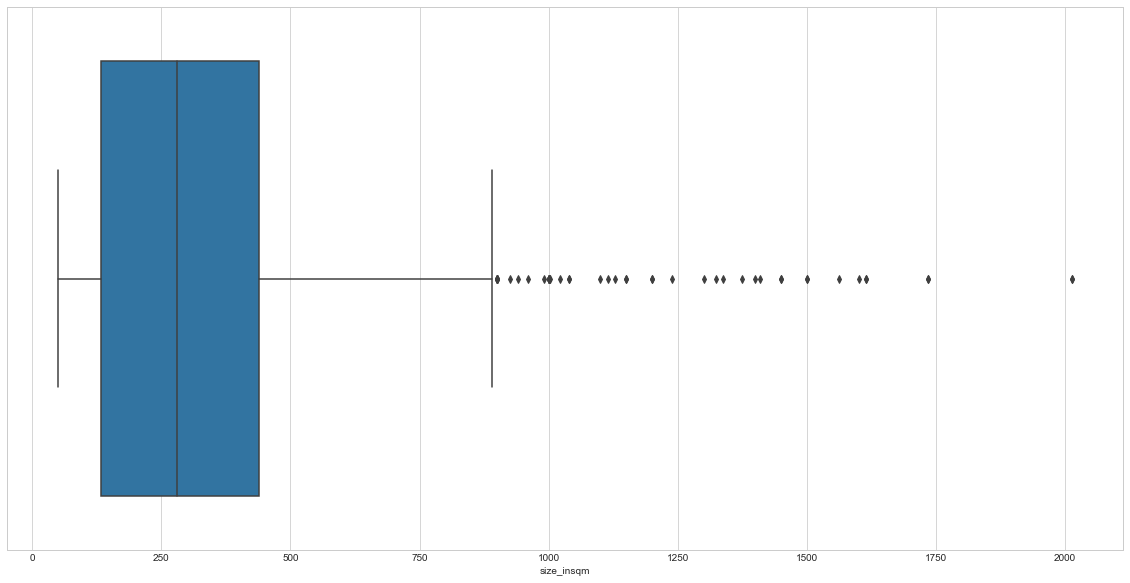

In [738]:
sns.boxplot(x=df['size_insqm'])

In [739]:
#outliers, normalisation,dummy variables,insights/EDA, model creation

In [740]:
df.dtypes

price                  int64
number_ofpictures    float64
size_insqm           float64
bedrooms               int64
property_type         object
municipality          object
floor_levels          object
IsElevator           float64
dtype: object

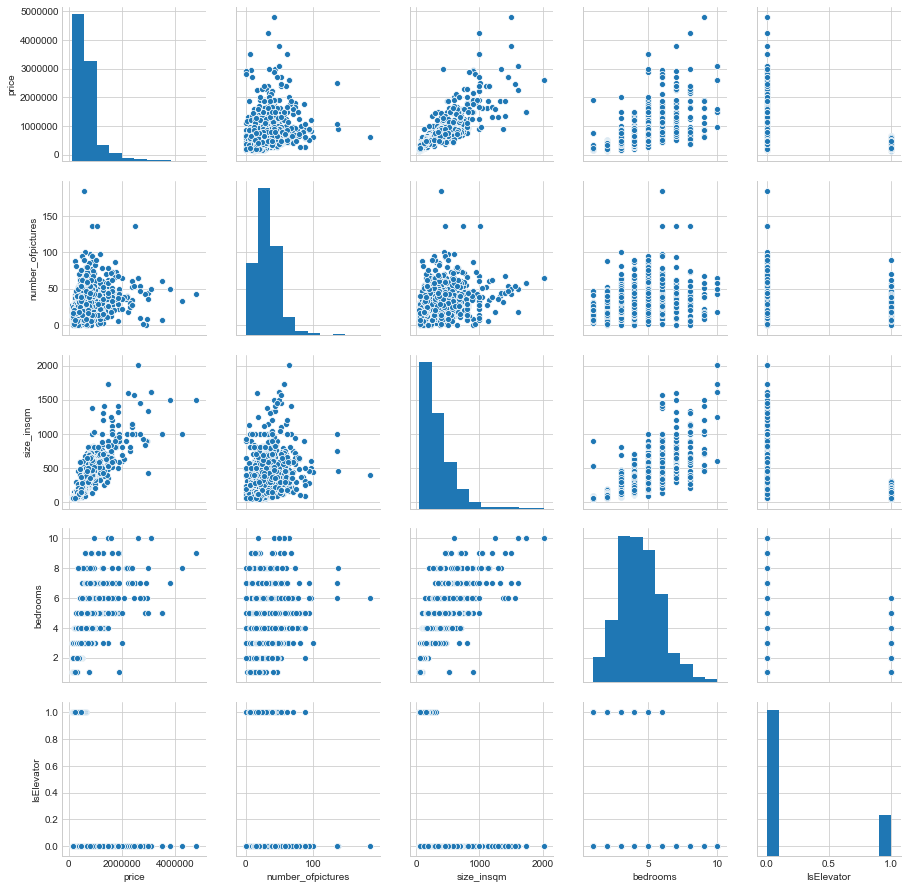

In [741]:
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)
sns.pairplot(df)
plt.savefig('pairplor.png')

Text(0.5, 0, 'number_ofpictures')

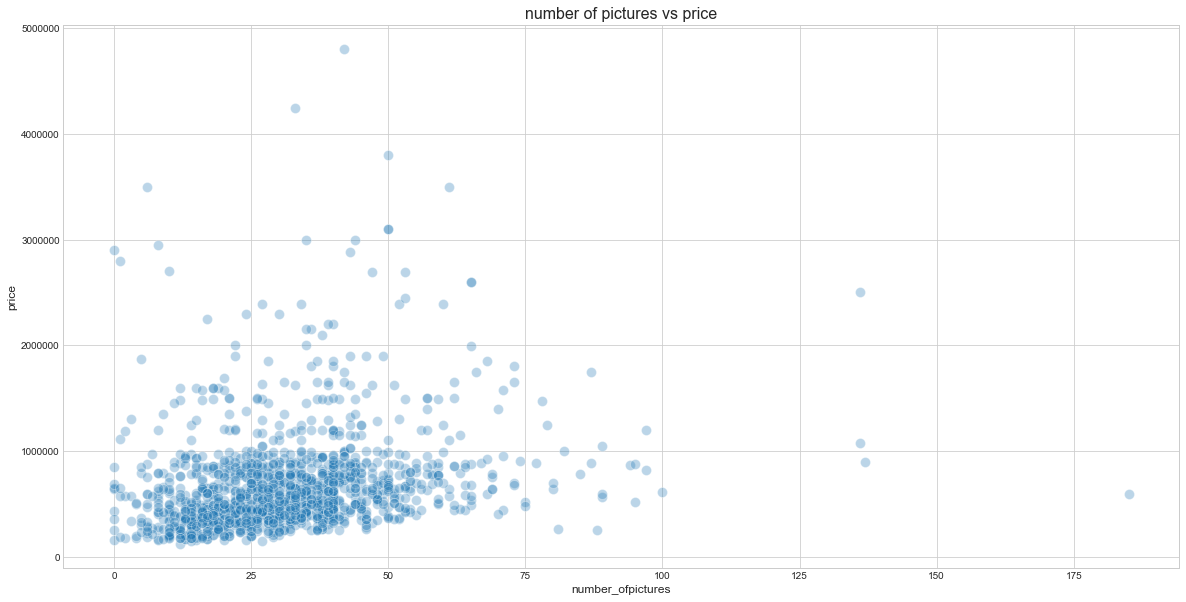

In [742]:
plt.scatter(x = 'number_ofpictures', y = 'price', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('number of pictures vs price', fontsize = 16)
plt.ylabel('price', fontsize = 12)
plt.xlabel('number_ofpictures', fontsize = 12)

Text(0.5, 0, 'size_insqm')

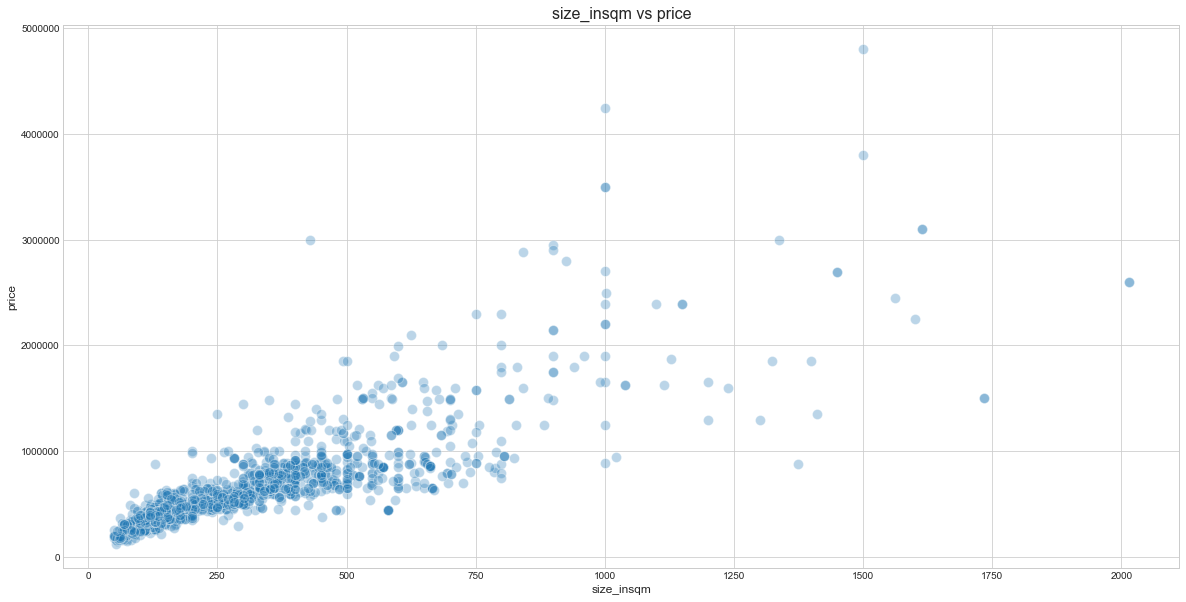

In [743]:
plt.scatter(x = 'size_insqm', y = 'price', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('size_insqm vs price', fontsize = 16)
plt.ylabel('price', fontsize = 12)
plt.xlabel('size_insqm', fontsize = 12)

Text(0.5, 0, 'bedrooms')

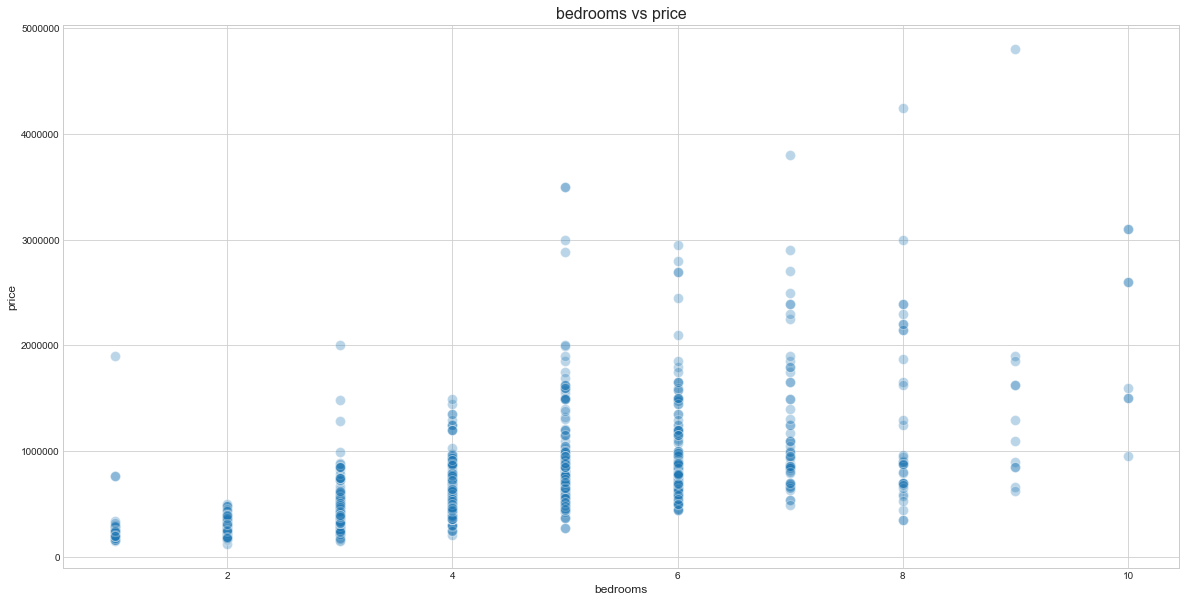

In [744]:
plt.scatter(x = 'bedrooms', y = 'price', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('bedrooms vs price', fontsize = 16)
plt.ylabel('price', fontsize = 12)
plt.xlabel('bedrooms', fontsize = 12)

In [745]:
df["IsElevator"] = df["IsElevator"].astype('category')
df["IsElevator"] = df["IsElevator"].cat.codes

In [746]:
df = pd.get_dummies(df, prefix=['floor_levels'], columns=['floor_levels'])

In [747]:
df = pd.get_dummies(df, prefix=['property'], columns=['property_type'])

In [748]:
df = pd.get_dummies(df, prefix=['municipality'], columns=['municipality'])

In [749]:
df.head()

,price,number_ofpictures,size_insqm,bedrooms,IsElevator,floor_levels_1ª,floor_levels_2ª,floor_levels_3ª,floor_levels_4ª,floor_levels_planta baja,property_Chalet adosado,property_Chalet independiente,property_Chalet pareado,property_Dúplex,property_Palacio,property_Piso,property_Ático,municipality_Boadilla del Monte,municipality_Las Rozas de Madrid,municipality_Torrelodones
681,650000,17.0,368.0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
208,625000,25.0,352.0,5,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
1006,425000,27.0,240.0,5,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
714,210000,18.0,62.0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
845,333000,19.0,110.0,2,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [750]:
## removing columns to avoid the trap
df.drop(["floor_levels_4ª","property_Chalet adosado","municipality_Boadilla del Monte"], axis=1, inplace=True)

In [751]:
df.shape

(1386, 17)

In [785]:
df.to_csv(r'output.csv', index = False)

In [752]:
Y1 = df['price']
X1 = df.drop(columns=['price'])

In [765]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,Y1,test_size=0.3,random_state=42)

In [766]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                              577.3
Date:                Sat, 06 Mar 2021   Prob (F-statistic):                        0.00
Time:                        15:14:27   Log-Likelihood:                         -13448.
No. Observations:                 970   AIC:                                  2.693e+04
Df Residuals:                     954   BIC:                                  2.701e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
number_ofpictures                  461.2595    503.510      0.916      0.360    -526.856    1449.375
size_insqm                        1427.7816     54.065     26.408      0.000    1321.681    1533.882
bedrooms                          2676.1565   8132.625      0.329      0.742   -1.33e+04    1.86e+04
IsElevator                         7.53e+04    4.1e+04      1.836      0.067   -5165.915    1.56e+05
floor_levels_1ª                   2.313e+05   6.11e+04      3.785      0.000    1.11e+05    3.51e+05
floor_levels_2ª                   2.096e+05    6.2e+04      3.380      0.001    8.79e+04    3.31e+05
floor_levels_3ª                   1.712e+05    6.6e+04      2.596      0.010    4.18e+04    3.01e+05
floor_levels_planta baja          2.025e+05   3.78e+04      5.351      0.000    1.28e+05    2.77e+05
property_Chalet independiente     1.369e+05   2.67e+04      5.129      0.000    8.45e+04    1.89e+05
property_Chalet pareado           2.286e+04   3.84e+04      0.595      0.552   -5.25e+04    9.82e+04
property_Dúplex                   3.681e+04   4.31e+04      0.853      0.394   -4.78e+04    1.21e+05
property_Palacio                 -1.011e+06   2.66e+05     -3.799      0.000   -1.53e+06   -4.89e+05
property_Piso                     5340.6123   3.51e+04      0.152      0.879   -6.36e+04    7.43e+04
property_Ático                    7.949e+04   5.96e+04      1.333      0.183   -3.75e+04    1.97e+05
municipality_Las Rozas de Madrid  -1.23e+05   2.26e+04     -5.447      0.000   -1.67e+05   -7.87e+04
municipality_Torrelodones        -2.222e+05   2.72e+04     -8.168      0.000   -2.76e+05   -1.69e+05
==============================================================================
Omnibus:                      640.500   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18787.509
Skew:                           2.554   Prob(JB):                         0.00
Kurtosis:                      23.946   Cond. No.                     1.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- p-value smaller than 0.05 features are significant

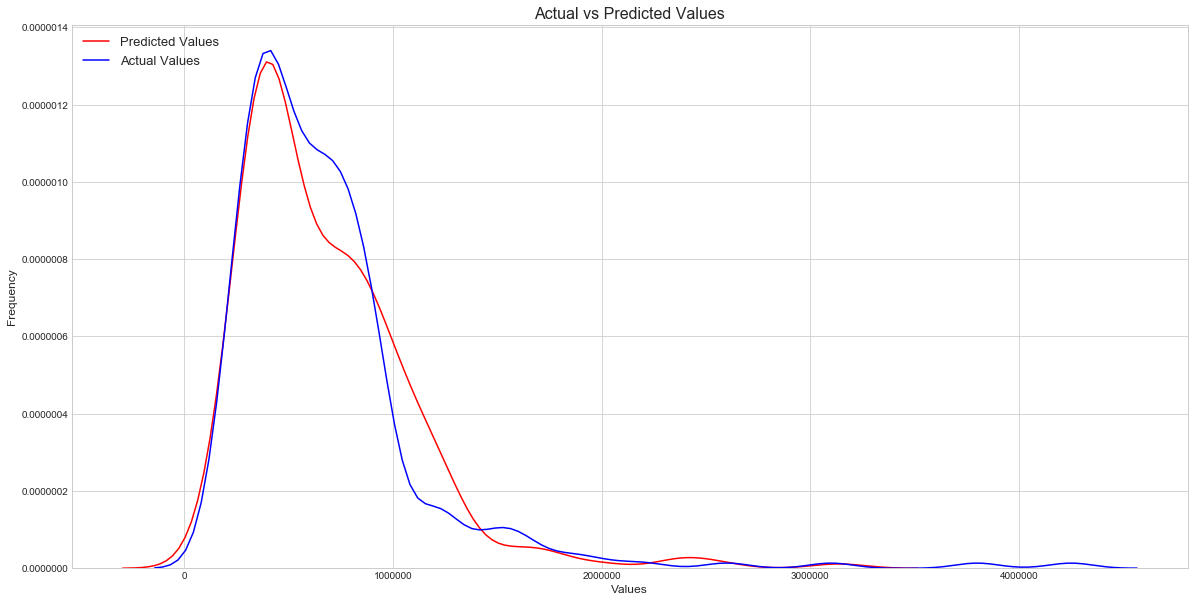

In [755]:
sns.distplot(predictions, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

In [764]:
X1.columns

Index(['number_ofpictures', 'size_insqm', 'bedrooms', 'IsElevator',
       'floor_levels_1ª', 'floor_levels_2ª', 'floor_levels_3ª',
       'floor_levels_planta baja', 'property_Chalet independiente',
       'property_Chalet pareado', 'property_Dúplex', 'property_Palacio',
       'property_Piso', 'property_Ático', 'municipality_Las Rozas de Madrid',
       'municipality_Torrelodones'],
      dtype='object')

In [772]:
X2=df[['number_ofpictures', 'size_insqm', 'IsElevator',
       'floor_levels_1ª', 'floor_levels_2ª', 'floor_levels_3ª',
       'floor_levels_planta baja', 'property_Chalet independiente',
        'property_Dúplex', 'property_Palacio',
       'property_Ático', 'municipality_Las Rozas de Madrid',
       'municipality_Torrelodones']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y1, test_size = 0.3, random_state = 42)

print('Training Data Count:', X2_train.shape[0])
print('Testing Data Count::', X2_test.shape[0])


model2 = sm.OLS(y2_train, X2_train).fit()
predictions = model2.predict(X2_test) # make the predictions by the model

# Print out the statistics
model2.summary()

Training Data Count: 970
Testing Data Count:: 416


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                              712.4
Date:                Sat, 06 Mar 2021   Prob (F-statistic):                        0.00
Time:                        15:19:34   Log-Likelihood:                         -13448.
No. Observations:                 970   AIC:                                  2.692e+04
Df Residuals:                     957   BIC:                                  2.699e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
number_ofpictures                  488.8273    497.900      0.982      0.326    -488.275    1465.929
size_insqm                        1440.4762     43.968     32.762      0.000    1354.191    1526.761
IsElevator                        7.598e+04   4.06e+04      1.872      0.062   -3683.477    1.56e+05
floor_levels_1ª                   2.392e+05   4.51e+04      5.304      0.000    1.51e+05    3.28e+05
floor_levels_2ª                   2.173e+05   4.75e+04      4.571      0.000    1.24e+05    3.11e+05
floor_levels_3ª                    1.79e+05   5.42e+04      3.304      0.001    7.27e+04    2.85e+05
floor_levels_planta baja          2.146e+05   2.36e+04      9.090      0.000    1.68e+05    2.61e+05
property_Chalet independiente     1.302e+05   2.29e+04      5.674      0.000    8.52e+04    1.75e+05
property_Dúplex                   3.128e+04   3.55e+04      0.880      0.379   -3.85e+04    1.01e+05
property_Palacio                 -1.021e+06   2.65e+05     -3.856      0.000   -1.54e+06   -5.02e+05
property_Ático                    7.523e+04   5.32e+04      1.414      0.158   -2.92e+04     1.8e+05
municipality_Las Rozas de Madrid -1.212e+05    2.1e+04     -5.760      0.000   -1.63e+05   -7.99e+04
municipality_Torrelodones        -2.204e+05    2.6e+04     -8.476      0.000   -2.71e+05   -1.69e+05
==============================================================================
Omnibus:                      636.638   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18574.864
Skew:                           2.533   Prob(JB):                         0.00
Kurtosis:                      23.831   Cond. No.                     1.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

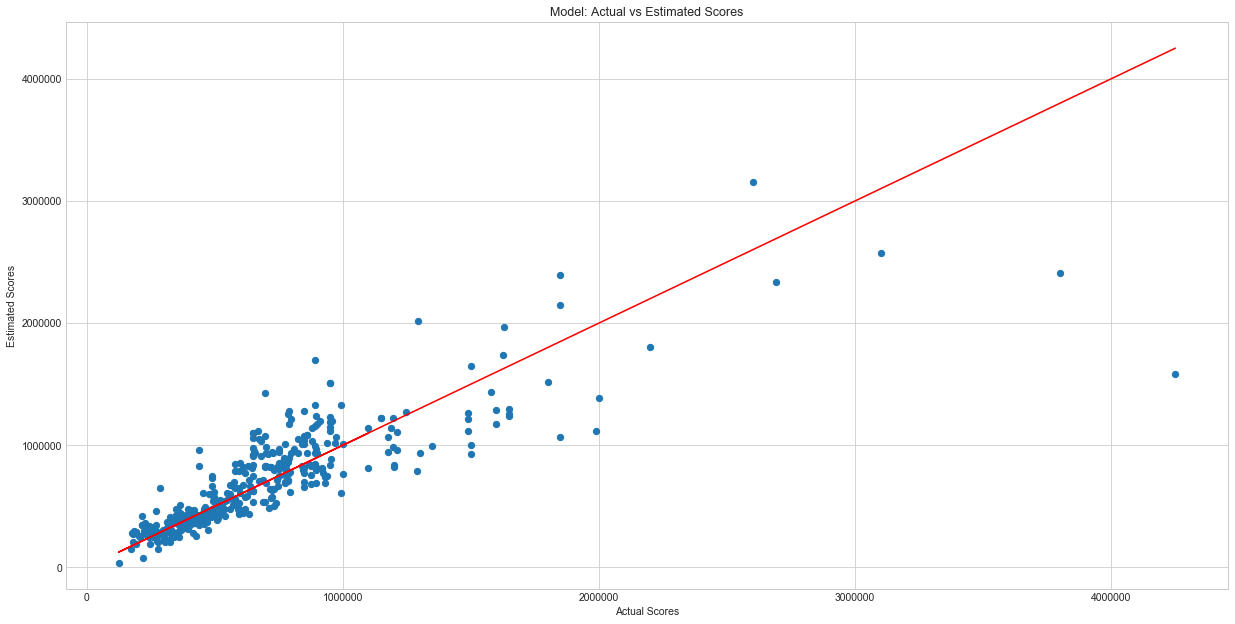

In [777]:
plt.figure(dpi = 75)
plt.scatter(y2_test, predictions)
plt.plot(y2_test, y2_test, color="red")
plt.xlabel("Actual Scores")
plt.ylabel("Estimated Scores")
plt.title("Model: Actual vs Estimated Scores")
plt.show()

In [780]:
print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y2_test, predictions)))
print("Mean Squared Error (MSE) : {}".format(mse(y2_test, predictions)))
print("Root Mean Squared Error (RMSE) : {}".format(rmse(y2_test, predictions)))
print("Root Mean Squared Error (RMSE) : {}".format(rmse(y2_test, predictions)))
print("Mean Absolute Perc. Error (MAPE) : {}".format(np.mean(np.abs((y2_test - predictions) / y2_test)) * 100))

Mean Absolute Error (MAE)         : 141072.14482537756
Mean Squared Error (MSE) : 60299100951.55232
Root Mean Squared Error (RMSE) : 245558.75254519502
Root Mean Squared Error (RMSE) : 245558.75254519502
Mean Absolute Perc. Error (MAPE) : 19.948013075419226


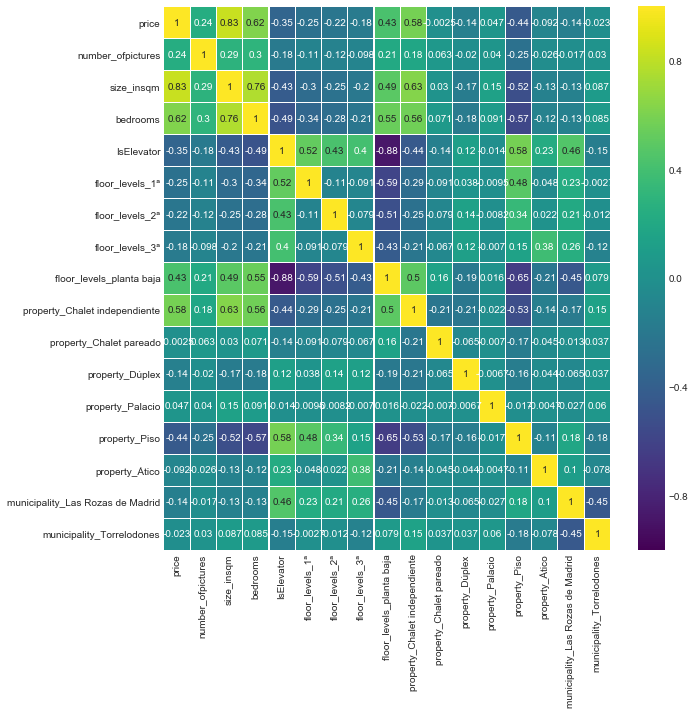

In [756]:
df_kor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)